# Genre Surf - music genre classification V#2

## 1. Dataset download

In [1]:
# kaggle API 인증
import os
os.environ['KAGGLE_USERNAME'] = "lindocachete"
os.environ['KAGGLE_KEY'] = "e23976ec213f99d8ef61e215e881c977"

In [2]:
# kaggle 안의 GTZAN 활용을 위해 kaggle 설치
!pip install kaggle

In [3]:
# GTZAN의 음악 장르 데이터셋 다운로드 받기
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

100%|██████████████████████████████████████| 1.21G/1.21G [02:02<00:00, 11.7MB/s]
100%|██████████████████████████████████████| 1.21G/1.21G [02:02<00:00, 10.6MB/s]


In [4]:
# 데이터셋 압축 해제하기
!unzip -q gtzan-dataset-music-genre-classification.zip

In [6]:
# 오디오 분석 라이브러리 설치
!pip install librosa

## 2. Upload audio file

In [91]:
# import
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import sklearn

In [459]:
# 파일명 입력
filename = 'FF.wav'

# y: 시간에 따른 파형 그래프, 소리 및 신호가 떨리는 세기 및 진폭 / Waveform
# sr: 1초당 샘플의 개수(Hz) / Sampling Rate
# y, sr = librosa.load('Data/' + filename)
y, sr = librosa.load('Data/genres_original/pop/pop.00006.wav')

print(y)
print(len(y))
print('Sampling rate: ', sr)
print('Audio length: ', (len(y) / sr))

[-0.0340271  -0.04330444 -0.0463562  ...  0.08895874  0.06835938
  0.01708984]
661504
Sampling rate:  22050
Audio length:  30.00018140589569


In [460]:
# 오디오 파일 및 스펙트럼 확인
import IPython.display as ipd

ipd.Audio(y, rate = sr)

## 3. Extract audio features
- length
- chroma frequencies
- RMS
- spectral centroid
- spectral bandwidth
- spectral rolloff
- zero crossing rate
- harmonic components
- percussive components
- tempo
- MFCCs

In [461]:
# 오디오 파일 분석 결과 사전(dict)
audioFeatures = dict()

# 파일명 저장
# audioFeatures.append(filename)

# 결과 확인
# print('Audio feature values: ', audioFeatures)

In [462]:
# 오디오 파일의 파형 그래프 길이
audioLengthY = len(y)
audioFeatures['length'] = 0.0
# audioFeatures.append(audioLengthY)

# 결과 확인
print('Audio feature values: ', audioFeatures)

Audio feature values:  {'length': 0.0}


Audio feature values:  {'length': 0.0, 'chroma_stft_mean': 0.37445438, 'chroma_stft_var': 0.08583022}


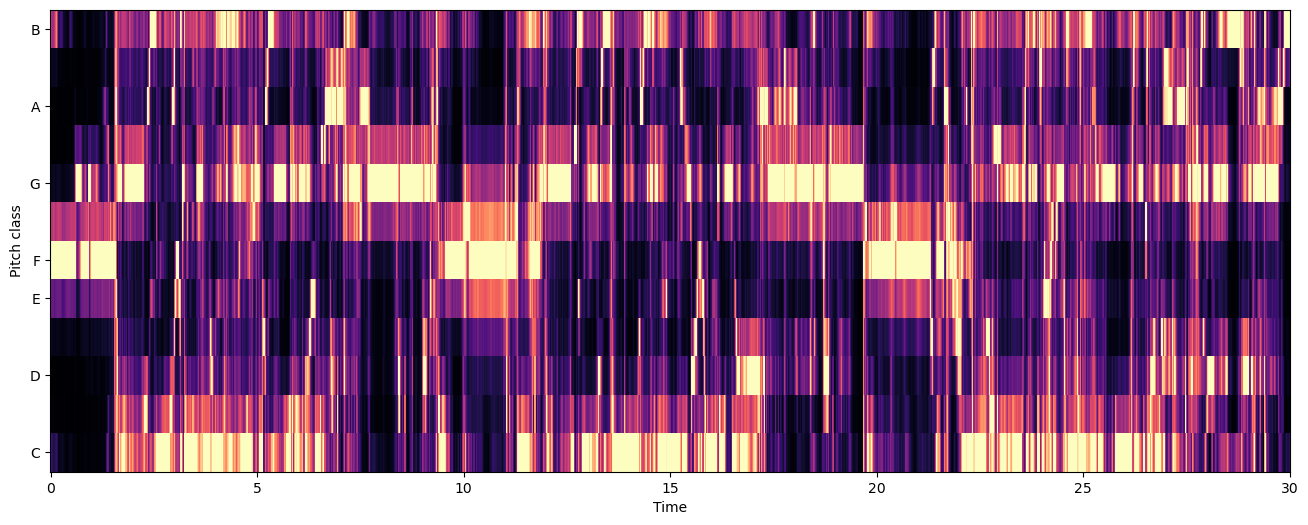

In [463]:
# 오디오 파일 내의 음높이 분포도
chroma = librosa.feature.chroma_stft(y = y, sr = sr)
audioFeatures['chroma_stft_mean'] = chroma.mean()
audioFeatures['chroma_stft_var'] = chroma.var()
# audioFeatures.append(chroma.mean())
# audioFeatures.append(chroma.var())

# 결과 확인
print('Audio feature values: ', audioFeatures)

plt.figure(figsize = (16,6))
librosa.display.specshow(chroma, y_axis = 'chroma',x_axis = 'time')
plt.show()

Audio feature values:  {'length': 0.0, 'chroma_stft_mean': 0.37445438, 'chroma_stft_var': 0.08583022, 'rms_mean': 0.093941845, 'rms_var': 0.0014611296}


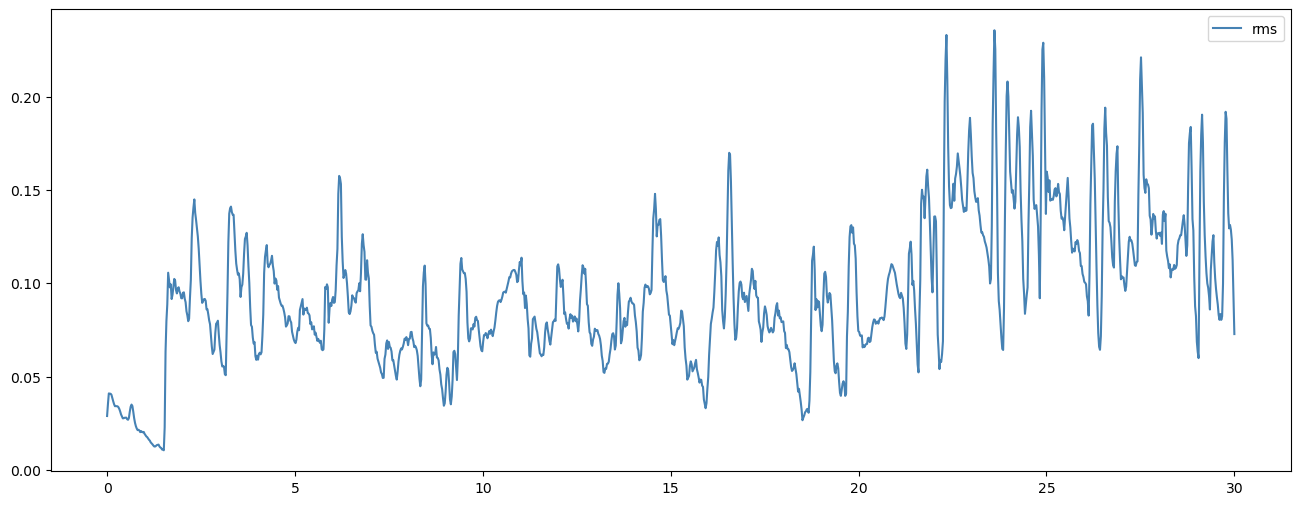

In [464]:
# 오디오 파일의 시간에 따른 음파 변화 분석
rms = librosa.feature.rms(y = y)
audioFeatures['rms_mean'] = rms.mean()
audioFeatures['rms_var'] = rms.var()

# 결과 확인
print('Audio feature values: ', audioFeatures)

plt.figure(figsize = (16,6))
times = librosa.times_like(rms)
plt.plot(times, rms[0], label = 'rms', color = 'steelblue')
plt.legend()
plt.show()

Audio feature values:  {'length': 0.0, 'chroma_stft_mean': 0.37445438, 'chroma_stft_var': 0.08583022, 'rms_mean': 0.093941845, 'rms_var': 0.0014611296, 'spectral_centroid_mean': 2125.3878140504357, 'spectral_centroid_var': 724774.2425359885, 'spectral_bandwidth_mean': 2673.835976774353, 'spectral_bandwidth_var': 213159.0431661942, 'rolloff_mean': 4978.558165512616, 'rolloff_var': 3613058.6707901964}


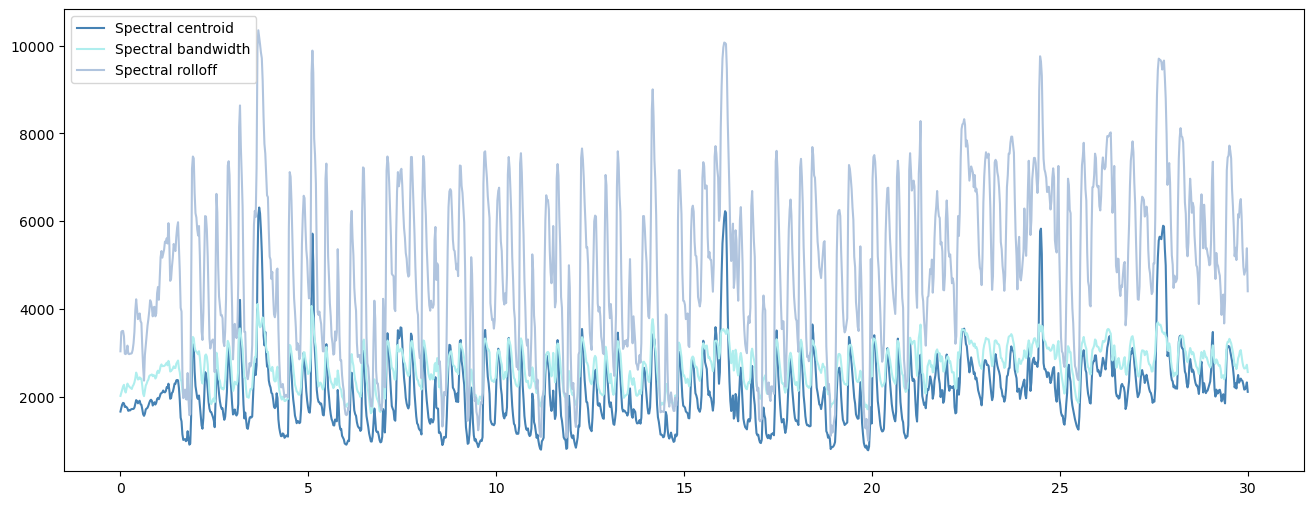

In [465]:
# 오디오 파일의 무게중심 분석
spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
audioFeatures['spectral_centroid_mean'] = spec_cent.mean()
audioFeatures['spectral_centroid_var'] = spec_cent.var()

# 오디오 파일의 주파수 대역폭 분석
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
audioFeatures['spectral_bandwidth_mean'] = spec_bw.mean()
audioFeatures['spectral_bandwidth_var'] = spec_bw.var()

# 오디오 파일의 최상/최하 주파수의 감쇠현상 분석
spec_rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
audioFeatures['rolloff_mean'] = spec_rolloff.mean()
audioFeatures['rolloff_var'] = spec_rolloff.var()

# 결과 확인
print('Audio feature values: ', audioFeatures)

plt.figure(figsize = (16,6))
times = librosa.times_like(spec_cent)
plt.plot(times, spec_cent.T, label = 'Spectral centroid', color = 'steelblue')
plt.plot(times, spec_bw.T, label = 'Spectral bandwidth', color = 'paleturquoise')
plt.plot(times, spec_rolloff.T, label = 'Spectral rolloff', color = 'lightsteelblue')
plt.legend()
plt.show()

In [466]:
# 오디오 파일의 볼륨 영교차 분석
zeroCrossingRate = librosa.feature.zero_crossing_rate(y)
audioFeatures['zero_crossing_rate_mean'] = zeroCrossingRate.mean()
audioFeatures['zero_crossing_rate_var'] = zeroCrossingRate.var()

# 결과 확인
print('Audio feature values: ', audioFeatures)

Audio feature values:  {'length': 0.0, 'chroma_stft_mean': 0.37445438, 'chroma_stft_var': 0.08583022, 'rms_mean': 0.093941845, 'rms_var': 0.0014611296, 'spectral_centroid_mean': 2125.3878140504357, 'spectral_centroid_var': 724774.2425359885, 'spectral_bandwidth_mean': 2673.835976774353, 'spectral_bandwidth_var': 213159.0431661942, 'rolloff_mean': 4978.558165512616, 'rolloff_var': 3613058.6707901964, 'zero_crossing_rate_mean': 0.06768001075502707, 'zero_crossing_rate_var': 0.0027092515422841154}


In [467]:
# 오디오 파일의 하모닉 및 고조파류(수평적 요소), 타악기류(수직적 요소) 사운드 분석
harmony, perceptr = librosa.effects.hpss(y, margin = 3.0)
audioFeatures['harmony_mean'] = harmony.mean()
audioFeatures['harmony_var'] = harmony.var()
audioFeatures['perceptr_mean'] = perceptr.mean()
audioFeatures['perceptr_var'] = perceptr.var()

# 결과 확인
print('Audio feature values: ', audioFeatures)

Audio feature values:  {'length': 0.0, 'chroma_stft_mean': 0.37445438, 'chroma_stft_var': 0.08583022, 'rms_mean': 0.093941845, 'rms_var': 0.0014611296, 'spectral_centroid_mean': 2125.3878140504357, 'spectral_centroid_var': 724774.2425359885, 'spectral_bandwidth_mean': 2673.835976774353, 'spectral_bandwidth_var': 213159.0431661942, 'rolloff_mean': 4978.558165512616, 'rolloff_var': 3613058.6707901964, 'zero_crossing_rate_mean': 0.06768001075502707, 'zero_crossing_rate_var': 0.0027092515422841154, 'harmony_mean': 4.6638817e-07, 'harmony_var': 0.003143112, 'perceptr_mean': -1.8066985e-05, 'perceptr_var': 0.00021912338}


In [468]:
# 오디오 파일의 템포(BPM) 분석
tempo,_ = librosa.beat.beat_track(y = y, sr = sr)
audioFeatures['tempo'] = tempo

# 결과 확인
print('Audio feature values: ', audioFeatures)

Audio feature values:  {'length': 0.0, 'chroma_stft_mean': 0.37445438, 'chroma_stft_var': 0.08583022, 'rms_mean': 0.093941845, 'rms_var': 0.0014611296, 'spectral_centroid_mean': 2125.3878140504357, 'spectral_centroid_var': 724774.2425359885, 'spectral_bandwidth_mean': 2673.835976774353, 'spectral_bandwidth_var': 213159.0431661942, 'rolloff_mean': 4978.558165512616, 'rolloff_var': 3613058.6707901964, 'zero_crossing_rate_mean': 0.06768001075502707, 'zero_crossing_rate_var': 0.0027092515422841154, 'harmony_mean': 4.6638817e-07, 'harmony_var': 0.003143112, 'perceptr_mean': -1.8066985e-05, 'perceptr_var': 0.00021912338, 'tempo': 92.28515625}


In [469]:
# 오디오 파일의 MFCCs 및 음색 분석
mfcc = librosa.feature.mfcc(y = y, sr = sr)

# MFCC 추출이 정상적으로 되었는지 확인, 배열 20개가 나오면 정상
print(len(mfcc))

for i in range(0, len(mfcc)):
    mfcc_mean = 'mfcc' + str(i + 1) + '_mean'
    mfcc_var = 'mfcc' + str(i + 1) + '_var'
    audioFeatures[mfcc_mean] = mfcc[i].mean()
    audioFeatures[mfcc_var] = mfcc[i].var()
    
# 결과 확인
print('Audio feature values: ', audioFeatures)

# label은 학습에 사용하지 않으므로 비워둔다.

20
Audio feature values:  {'length': 0.0, 'chroma_stft_mean': 0.37445438, 'chroma_stft_var': 0.08583022, 'rms_mean': 0.093941845, 'rms_var': 0.0014611296, 'spectral_centroid_mean': 2125.3878140504357, 'spectral_centroid_var': 724774.2425359885, 'spectral_bandwidth_mean': 2673.835976774353, 'spectral_bandwidth_var': 213159.0431661942, 'rolloff_mean': 4978.558165512616, 'rolloff_var': 3613058.6707901964, 'zero_crossing_rate_mean': 0.06768001075502707, 'zero_crossing_rate_var': 0.0027092515422841154, 'harmony_mean': 4.6638817e-07, 'harmony_var': 0.003143112, 'perceptr_mean': -1.8066985e-05, 'perceptr_var': 0.00021912338, 'tempo': 92.28515625, 'mfcc1_mean': -169.12946, 'mfcc1_var': 4908.413, 'mfcc2_mean': 94.64907, 'mfcc2_var': 577.69855, 'mfcc3_mean': 24.48003, 'mfcc3_var': 353.99106, 'mfcc4_mean': 27.384008, 'mfcc4_var': 181.76631, 'mfcc5_mean': 11.639039, 'mfcc5_var': 61.881386, 'mfcc6_mean': 14.885311, 'mfcc6_var': 105.03167, 'mfcc7_mean': 4.2372394, 'mfcc7_var': 63.2628, 'mfcc8_mean':

## Train model

In [474]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [475]:
# 학습할 데이터 가져오기
data = pd.read_csv('Data/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [476]:
Y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label' ] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [477]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Accuracy : 0.87988 



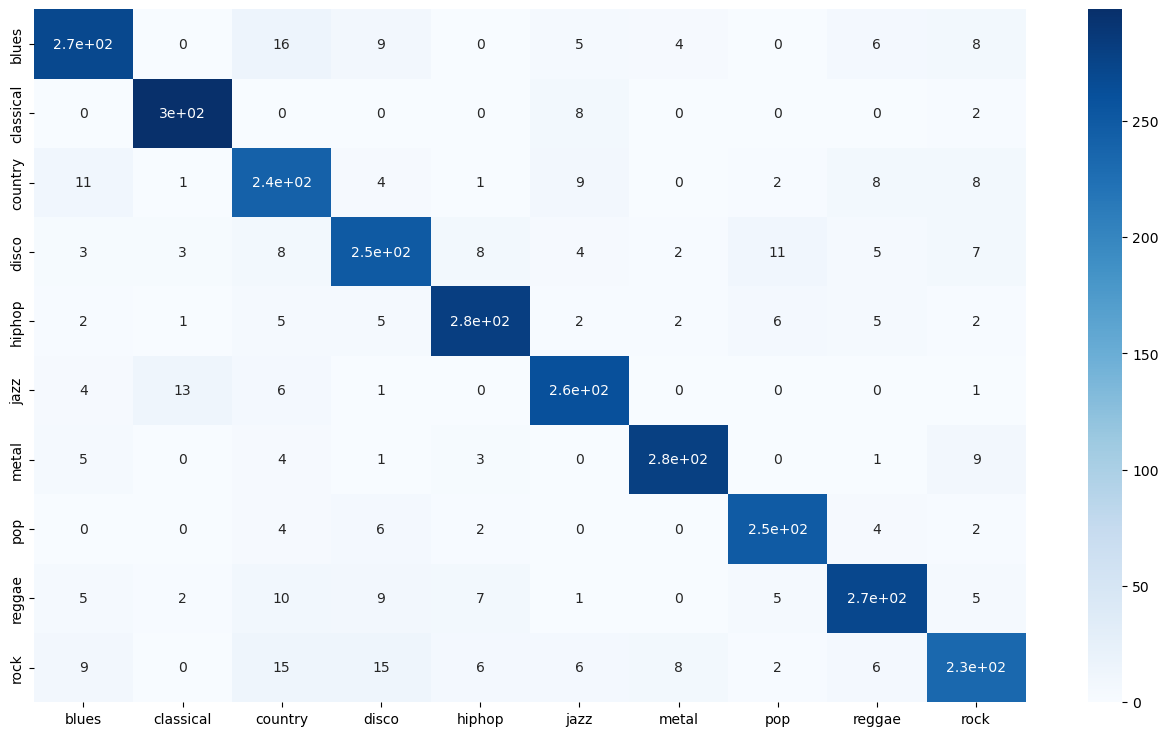

In [481]:
# Extreme gradient boosting model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# 오차 행렬 확인
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.show()

In [482]:
# 사용자 입력 오디오 파일에 대한 장르 예측 및 결과 도출
newAudioDF = pd.DataFrame.from_dict([audioFeatures])
classifiedGenre = xgb.predict(newAudioDF)
print(classifiedGenre)

['pop']
